In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

**make_regression()** : Generate a random regression problem.

### Pytorch model expects input and output as torch and not np array


# Linear Regression

In [2]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
print(type(X), type(y))

# Converting to torch
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))
print(type(X), type(y))

print("Before reshaping, ", X.shape, y.shape)
y = y.reshape(y.shape[0], -1)
print("After reshaping, ", X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
Before reshaping,  torch.Size([100, 1]) torch.Size([100])
After reshaping,  torch.Size([100, 1]) torch.Size([100, 1])


In [3]:
n_samples, n_features = X.shape

model = nn.Linear(in_features=n_features, out_features=1)

n_epochs = 500
lr = 0.01
# Loss
criterion = nn.MSELoss()
# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)

for epoch in range(1, n_epochs+1):
    # Fwd pass
    y_pred = model(X)
    # Calculate loss
    loss = criterion(y_pred, y)
    # Backward pass
    loss.backward()
    # Weights update
    optimizer.step()
    # Emptying gradients
    optimizer.zero_grad()

    if epoch%100==0:
        print(f"Epoch {epoch}/{n_epochs} loss={loss.item():.5f}")


Epoch 100/500 loss=558.55072
Epoch 200/500 loss=342.36520
Epoch 300/500 loss=333.00027
Epoch 400/500 loss=332.58679
Epoch 500/500 loss=332.56848


Plotting values
___
By default, **model(X).required_grad=True**. So, we have to manually disable it


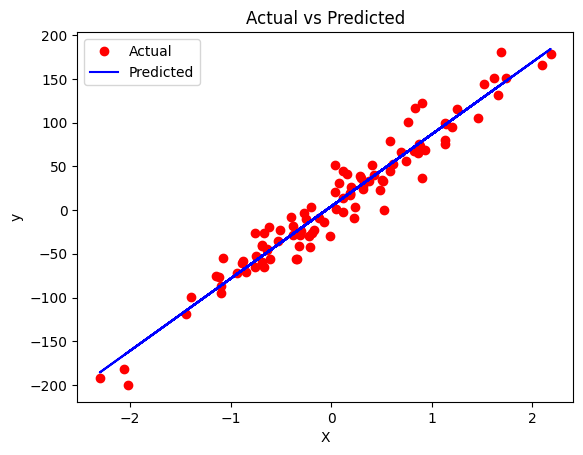

In [4]:
# We don't want to perform operations on computation graph now
predicted = model(X).detach()

plt.plot(X, y, 'ro', label='Actual')
plt.plot(X, predicted, 'b', label='Predicted')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

plt.show()

# Logistic Regression

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

print(type(X), type(y))

# Changing types
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

print(f"Before reshaping = {X.shape}, {y.shape}")
y = y.reshape(y.shape[0], -1)
print(f"After reshaping = {X.shape}, {y.shape}")

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Before reshaping = torch.Size([569, 30]), torch.Size([569])
After reshaping = torch.Size([569, 30]), torch.Size([569, 1])


In [7]:
n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

569 30


### Scaling the features with 0 mean and unit variance

Scaling will result ouput in numpy array. So perform standardisation before casting to tensor

In [8]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Defining Model

In [9]:
class LogisticRegression(nn.Module):
    def __init__(self, in_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_features=in_features, out_features=1)

    def forward(self, x):
        y_pred = self.linear(x)
        return torch.sigmoid(y_pred)

In [14]:
model = LogisticRegression(n_features)

n_epochs = 1000
lr = 0.001
# Binary Cross Entropy loss
criterion = nn.BCELoss()
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(1, n_epochs+1):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch%100==0:
        print(f"Epoch {epoch}/{n_epochs}, Loss = {loss.item():.5f}")


Epoch 100/1000, Loss = 0.69725
Epoch 200/1000, Loss = 0.53199
Epoch 300/1000, Loss = 0.42127
Epoch 400/1000, Loss = 0.33654
Epoch 500/1000, Loss = 0.27629
Epoch 600/1000, Loss = 0.23418
Epoch 700/1000, Loss = 0.20514
Epoch 800/1000, Loss = 0.18530
Epoch 900/1000, Loss = 0.17183
Epoch 1000/1000, Loss = 0.16266


### Getting Test accuracy

In [15]:
num_samples = y_test.shape[0]
with torch.no_grad():
    y_predicted = model(X_test)
    y_pred_class = y_predicted.round()

    total_correct_predictions = y_pred_class.eq(y_test).sum()
    acc = total_correct_predictions / num_samples

    print(f"Test Accuracy = {acc*100:.3f}%")

Test Accuracy = 92.105%
